In [222]:
import numpy as np
import matplotlib as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import MetaTrader5 as mt5
import datetime
import pytz
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import GridSearchCV

In [223]:
# Importações para modelos do scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

-----

In [224]:
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()

In [225]:
# Set Symbol PAIR
symbol_main = "USDJPY"

# Set timeframe
timeframe = mt5.TIMEFRAME_H4

# MAIN INDEX

In [226]:
# Define Incial Date
start_date = datetime.datetime(2014, 1, 1)
# Last Value in range
end_date = datetime.datetime.now()

# Copy Data to variable 'rates'
rates = mt5.copy_rates_range(symbol_main, timeframe, start_date, end_date)

# Copy Secondary to variable 'rates'
#rates = mt5.copy_rates_range(symbol_main, timeframe, start_date, end_date)

In [227]:
symbol_1 = "EURUSD"
symbol_2 = "GBPUSD"
symbol_3 = "USDCHF"
symbol_4 = "USDCNH"
symbol_5 = "AUDUSD"
symbol_6 = "USDCAD"

symbol_7 = "NI225"
symbol_8 = "SP500m"


rates_sup1 = mt5.copy_rates_range(symbol_1, timeframe, start_date, end_date)
rates_sup2= mt5.copy_rates_range(symbol_2, timeframe, start_date, end_date)
rates_sup3 = mt5.copy_rates_range(symbol_3, timeframe, start_date, end_date)
rates_sup4= mt5.copy_rates_range(symbol_4, timeframe, start_date, end_date)
rates_sup5 = mt5.copy_rates_range(symbol_5, timeframe, start_date, end_date)
rates_sup6 = mt5.copy_rates_range(symbol_6, timeframe, start_date, end_date)

rates_sup7= mt5.copy_rates_range(symbol_7, timeframe, start_date, end_date)
rates_sup8= mt5.copy_rates_range(symbol_8, timeframe, start_date, end_date)



In [228]:
data_sup1 = pd.DataFrame(rates_sup1)
data_sup2 = pd.DataFrame(rates_sup2)
data_sup3 = pd.DataFrame(rates_sup3)
data_sup4 = pd.DataFrame(rates_sup4)
data_sup5 = pd.DataFrame(rates_sup5)
data_sup6 = pd.DataFrame(rates_sup6)

data_sup7 = pd.DataFrame(rates_sup7)
data_sup8 = pd.DataFrame(rates_sup8)



In [229]:
data_sup3

,time,open,high,low,close,tick_volume,spread,real_volume
0,1388606400,0.89155,0.89285,0.89115,0.89194,1490,6,0
1,1388620800,0.89194,0.89224,0.89099,0.89131,7614,6,0
2,1388635200,0.89133,0.89369,0.89080,0.89272,14814,6,0
3,1388649600,0.89272,0.89796,0.89229,0.89676,9265,1,0
4,1388664000,0.89677,0.90285,0.89672,0.90094,13238,1,0
...,...,...,...,...,...,...,...,...
15661,1706500800,0.86344,0.86389,0.86298,0.86388,4410,2,0
15662,1706515200,0.86387,0.86387,0.86069,0.86191,13191,3,0
15663,1706529600,0.86192,0.86352,0.86157,0.86319,10754,1,0
15664,1706544000,0.86320,0.86491,0.86260,0.86390,11298,2,0


-------

In [230]:
# Convert Time to Pandas format
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')  # Converting time 
#data.set_index('time', inplace=True)

In [231]:
data = data.drop(['spread', 'real_volume'], axis=1)

In [232]:
data

,time,open,high,low,close,tick_volume
0,2014-01-01 20:00:00,105.237,105.380,105.217,105.361,1092
1,2014-01-02 00:00:00,105.358,105.400,105.233,105.233,6177
2,2014-01-02 04:00:00,105.234,105.329,105.233,105.322,4938
3,2014-01-02 08:00:00,105.323,105.400,105.287,105.389,6252
4,2014-01-02 12:00:00,105.389,105.440,104.786,104.849,8466
...,...,...,...,...,...,...
15665,2024-01-29 04:00:00,148.127,148.248,147.988,148.026,18491
15666,2024-01-29 08:00:00,148.026,148.069,147.709,147.743,44951
15667,2024-01-29 12:00:00,147.743,148.093,147.731,147.973,32670
15668,2024-01-29 16:00:00,147.973,148.051,147.581,147.655,41993


In [233]:
data['close_EURUSD'] = data_sup1['close']
data['close_GBPUSD'] = data_sup2['close']
data['close_USDCHF'] = data_sup3['close']
#data['close_USDCNH'] = data_sup4['close']
data['close_AUDUSD'] = data_sup5['close']
data['close_USDCAD'] = data_sup6['close']

#data['close_NI225'] = data_sup7['close']
#data['close_SP500m'] = data_sup8['close']

In [237]:
data['close_USDCHF'][15666] = data['close_USDCHF'].mean()
data['close_USDCHF'][15667] = data['close_USDCHF'].mean()
data['close_USDCHF'][15668] = data['close_USDCHF'].mean()
data['close_USDCHF'][15669] = data['close_USDCHF'].mean()

C:\Users\bruno\AppData\Local\Temp\ipykernel_21736\3067093164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_USDCHF'][15666] = data['close_USDCHF'].mean()
C:\Users\bruno\AppData\Local\Temp\ipykernel_21736\3067093164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_USDCHF'][15667] = data['close_USDCHF'].mean()
C:\Users\bruno\AppData\Local\Temp\ipykernel_21736\3067093164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [238]:
data

,time,open,high,low,close,tick_volume,close_EURUSD,close_GBPUSD,close_USDCHF,close_AUDUSD,close_USDCAD
0,2014-01-01 20:00:00,105.237,105.380,105.217,105.361,1092,1.37580,1.65759,0.891940,0.88898,1.06460
1,2014-01-02 00:00:00,105.358,105.400,105.233,105.233,6177,1.37660,1.65814,0.891310,0.89184,1.06331
2,2014-01-02 04:00:00,105.234,105.329,105.233,105.322,4938,1.37502,1.65919,0.892720,0.89151,1.06314
3,2014-01-02 08:00:00,105.323,105.400,105.287,105.389,6252,1.37240,1.65535,0.896760,0.88645,1.06399
4,2014-01-02 12:00:00,105.389,105.440,104.786,104.849,8466,1.36465,1.64282,0.900940,0.89127,1.05899
...,...,...,...,...,...,...,...,...,...,...,...
15665,2024-01-29 04:00:00,148.127,148.248,147.988,148.026,18491,1.08398,1.27019,0.861140,0.65885,1.34479
15666,2024-01-29 08:00:00,148.026,148.069,147.709,147.743,44951,1.08252,1.27034,0.951885,0.66004,1.34355
15667,2024-01-29 12:00:00,147.743,148.093,147.731,147.973,32670,1.08204,1.26937,0.951885,0.65991,1.34381
15668,2024-01-29 16:00:00,147.973,148.051,147.581,147.655,41993,1.08115,1.26834,0.951885,0.65914,1.34464


In [239]:
data.describe()

,open,high,low,close,tick_volume,close_EURUSD,close_GBPUSD,close_USDCHF,close_AUDUSD,close_USDCAD
count,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000
mean,115.807215,115.978850,115.628937,115.811779,16673.364582,1.143071,1.356330,0.951885,0.740303,1.287949
std,12.452337,12.489967,12.409158,12.455958,11616.420935,0.081373,0.134637,0.040735,0.068846,0.074766
min,99.849000,100.033000,98.935000,99.845000,155.000000,0.955060,1.039980,0.835300,0.556760,1.058990
25%,107.789000,107.930250,107.655500,107.799500,8008.250000,1.091265,1.261150,0.917690,0.694410,1.260193
50%,111.315500,111.446500,111.160500,111.316000,13526.000000,1.125845,1.313610,0.961205,0.730840,1.306510
75%,120.001500,120.174750,119.820500,119.999750,22490.250000,1.179617,1.414850,0.987260,0.767537,1.335170
max,151.803000,151.945000,151.691000,151.804000,145761.000000,1.395120,1.717450,1.031230,0.949710,1.463950


<Axes: xlabel='time', ylabel='tick_volume'>

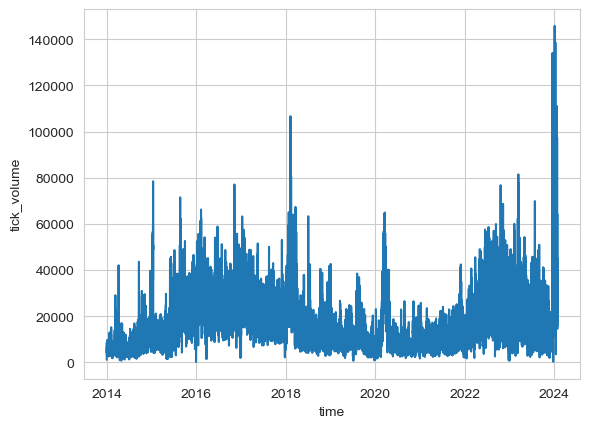

In [240]:
sns.lineplot(data = data, x='time', y = 'tick_volume')

------

# ADD RSI

In [241]:
# Cálculo das diferenças de preço diárias
delta = data['close'].diff()

# Separação dos ganhos e perdas
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# Cálculo da média dos ganhos e perdas
window = 14  # Período comum para RSI
avg_gain = gain.rolling(window=window, min_periods=1).mean()
avg_loss = loss.rolling(window=window, min_periods=1).mean()

# Cálculo do RSI
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Adicionando o RSI ao DataFrame
data['RSI'] = rsi

# Just to avoid first value Null
data['RSI'][0] = data['RSI'].mean()

C:\Users\bruno\AppData\Local\Temp\ipykernel_21736\991063548.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'][0] = data['RSI'].mean()


In [242]:
data

,time,open,high,low,close,tick_volume,close_EURUSD,close_GBPUSD,close_USDCHF,close_AUDUSD,close_USDCAD,RSI
0,2014-01-01 20:00:00,105.237,105.380,105.217,105.361,1092,1.37580,1.65759,0.891940,0.88898,1.06460,51.741817
1,2014-01-02 00:00:00,105.358,105.400,105.233,105.233,6177,1.37660,1.65814,0.891310,0.89184,1.06331,0.000000
2,2014-01-02 04:00:00,105.234,105.329,105.233,105.322,4938,1.37502,1.65919,0.892720,0.89151,1.06314,41.013825
3,2014-01-02 08:00:00,105.323,105.400,105.287,105.389,6252,1.37240,1.65535,0.896760,0.88645,1.06399,54.929577
4,2014-01-02 12:00:00,105.389,105.440,104.786,104.849,8466,1.36465,1.64282,0.900940,0.89127,1.05899,18.932039
...,...,...,...,...,...,...,...,...,...,...,...,...
15665,2024-01-29 04:00:00,148.127,148.248,147.988,148.026,18491,1.08398,1.27019,0.861140,0.65885,1.34479,60.384766
15666,2024-01-29 08:00:00,148.026,148.069,147.709,147.743,44951,1.08252,1.27034,0.951885,0.66004,1.34355,51.556055
15667,2024-01-29 12:00:00,147.743,148.093,147.731,147.973,32670,1.08204,1.26937,0.951885,0.65991,1.34381,53.188406
15668,2024-01-29 16:00:00,147.973,148.051,147.581,147.655,41993,1.08115,1.26834,0.951885,0.65914,1.34464,50.256761


# ADD EMA20/50/200

In [243]:
# Cálculo do EMA para diferentes intervalos
ema_20 = data['close'].ewm(span=20, adjust=False).mean()
ema_50 = data['close'].ewm(span=50, adjust=False).mean()
ema_200 = data['close'].ewm(span=200, adjust=False).mean()

# Adicionando as EMAs ao DataFrame
data['EMA_20'] = ema_20
data['EMA_50'] = ema_50
data['EMA_200'] = ema_200

In [244]:
data

,time,open,high,low,close,tick_volume,close_EURUSD,close_GBPUSD,close_USDCHF,close_AUDUSD,close_USDCAD,RSI,EMA_20,EMA_50,EMA_200
0,2014-01-01 20:00:00,105.237,105.380,105.217,105.361,1092,1.37580,1.65759,0.891940,0.88898,1.06460,51.741817,105.361000,105.361000,105.361000
1,2014-01-02 00:00:00,105.358,105.400,105.233,105.233,6177,1.37660,1.65814,0.891310,0.89184,1.06331,0.000000,105.348810,105.355980,105.359726
2,2014-01-02 04:00:00,105.234,105.329,105.233,105.322,4938,1.37502,1.65919,0.892720,0.89151,1.06314,41.013825,105.346256,105.354648,105.359351
3,2014-01-02 08:00:00,105.323,105.400,105.287,105.389,6252,1.37240,1.65535,0.896760,0.88645,1.06399,54.929577,105.350327,105.355995,105.359646
4,2014-01-02 12:00:00,105.389,105.440,104.786,104.849,8466,1.36465,1.64282,0.900940,0.89127,1.05899,18.932039,105.302582,105.336113,105.354565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15665,2024-01-29 04:00:00,148.127,148.248,147.988,148.026,18491,1.08398,1.27019,0.861140,0.65885,1.34479,60.384766,147.822119,147.478493,146.112767
15666,2024-01-29 08:00:00,148.026,148.069,147.709,147.743,44951,1.08252,1.27034,0.951885,0.66004,1.34355,51.556055,147.814584,147.488866,146.128989
15667,2024-01-29 12:00:00,147.743,148.093,147.731,147.973,32670,1.08204,1.26937,0.951885,0.65991,1.34381,53.188406,147.829671,147.507851,146.147337
15668,2024-01-29 16:00:00,147.973,148.051,147.581,147.655,41993,1.08115,1.26834,0.951885,0.65914,1.34464,50.256761,147.813036,147.513622,146.162339


# ADD Target FEATURE

In [245]:
# Cálculo da variação percentual diária
data['daily_return'] = data['close'].pct_change() * 100

# A primeira linha terá um valor NaN devido à natureza do cálculo da variação percentual
# Você pode optar por preencher com zero ou deixar como NaN, dependendo de sua análise
data['daily_return'].fillna(0, inplace=True)

In [246]:
data

,time,open,high,low,close,tick_volume,close_EURUSD,close_GBPUSD,close_USDCHF,close_AUDUSD,close_USDCAD,RSI,EMA_20,EMA_50,EMA_200,daily_return
0,2014-01-01 20:00:00,105.237,105.380,105.217,105.361,1092,1.37580,1.65759,0.891940,0.88898,1.06460,51.741817,105.361000,105.361000,105.361000,0.000000
1,2014-01-02 00:00:00,105.358,105.400,105.233,105.233,6177,1.37660,1.65814,0.891310,0.89184,1.06331,0.000000,105.348810,105.355980,105.359726,-0.121487
2,2014-01-02 04:00:00,105.234,105.329,105.233,105.322,4938,1.37502,1.65919,0.892720,0.89151,1.06314,41.013825,105.346256,105.354648,105.359351,0.084574
3,2014-01-02 08:00:00,105.323,105.400,105.287,105.389,6252,1.37240,1.65535,0.896760,0.88645,1.06399,54.929577,105.350327,105.355995,105.359646,0.063614
4,2014-01-02 12:00:00,105.389,105.440,104.786,104.849,8466,1.36465,1.64282,0.900940,0.89127,1.05899,18.932039,105.302582,105.336113,105.354565,-0.512387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15665,2024-01-29 04:00:00,148.127,148.248,147.988,148.026,18491,1.08398,1.27019,0.861140,0.65885,1.34479,60.384766,147.822119,147.478493,146.112767,-0.068185
15666,2024-01-29 08:00:00,148.026,148.069,147.709,147.743,44951,1.08252,1.27034,0.951885,0.66004,1.34355,51.556055,147.814584,147.488866,146.128989,-0.191183
15667,2024-01-29 12:00:00,147.743,148.093,147.731,147.973,32670,1.08204,1.26937,0.951885,0.65991,1.34381,53.188406,147.829671,147.507851,146.147337,0.155676
15668,2024-01-29 16:00:00,147.973,148.051,147.581,147.655,41993,1.08115,1.26834,0.951885,0.65914,1.34464,50.256761,147.813036,147.513622,146.162339,-0.214904


In [247]:
data.set_index('time', inplace=True)

In [248]:
# Finalize MT5 Connection
mt5.shutdown()

True

----------

# DF Looks Ready

In [249]:
data.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'close_EURUSD',
       'close_GBPUSD', 'close_USDCHF', 'close_AUDUSD', 'close_USDCAD', 'RSI',
       'EMA_20', 'EMA_50', 'EMA_200', 'daily_return'],
      dtype='object')

In [250]:
data.head(5)

,open,high,low,close,tick_volume,close_EURUSD,close_GBPUSD,close_USDCHF,close_AUDUSD,close_USDCAD,RSI,EMA_20,EMA_50,EMA_200,daily_return
time,,,,,,,,,,,,,,,
2014-01-01 20:00:00,105.237,105.380,105.217,105.361,1092,1.37580,1.65759,0.89194,0.88898,1.06460,51.741817,105.361000,105.361000,105.361000,0.000000
2014-01-02 00:00:00,105.358,105.400,105.233,105.233,6177,1.37660,1.65814,0.89131,0.89184,1.06331,0.000000,105.348810,105.355980,105.359726,-0.121487
2014-01-02 04:00:00,105.234,105.329,105.233,105.322,4938,1.37502,1.65919,0.89272,0.89151,1.06314,41.013825,105.346256,105.354648,105.359351,0.084574
2014-01-02 08:00:00,105.323,105.400,105.287,105.389,6252,1.37240,1.65535,0.89676,0.88645,1.06399,54.929577,105.350327,105.355995,105.359646,0.063614
2014-01-02 12:00:00,105.389,105.440,104.786,104.849,8466,1.36465,1.64282,0.90094,0.89127,1.05899,18.932039,105.302582,105.336113,105.354565,-0.512387


In [251]:
data.isnull().sum()

open            0
high            0
low             0
close           0
tick_volume     0
close_EURUSD    0
close_GBPUSD    0
close_USDCHF    0
close_AUDUSD    0
close_USDCAD    0
RSI             0
EMA_20          0
EMA_50          0
EMA_200         0
daily_return    0
dtype: int64

In [252]:
df = data.copy()

In [253]:
df

,open,high,low,close,tick_volume,close_EURUSD,close_GBPUSD,close_USDCHF,close_AUDUSD,close_USDCAD,RSI,EMA_20,EMA_50,EMA_200,daily_return
time,,,,,,,,,,,,,,,
2014-01-01 20:00:00,105.237,105.380,105.217,105.361,1092,1.37580,1.65759,0.891940,0.88898,1.06460,51.741817,105.361000,105.361000,105.361000,0.000000
2014-01-02 00:00:00,105.358,105.400,105.233,105.233,6177,1.37660,1.65814,0.891310,0.89184,1.06331,0.000000,105.348810,105.355980,105.359726,-0.121487
2014-01-02 04:00:00,105.234,105.329,105.233,105.322,4938,1.37502,1.65919,0.892720,0.89151,1.06314,41.013825,105.346256,105.354648,105.359351,0.084574
2014-01-02 08:00:00,105.323,105.400,105.287,105.389,6252,1.37240,1.65535,0.896760,0.88645,1.06399,54.929577,105.350327,105.355995,105.359646,0.063614
2014-01-02 12:00:00,105.389,105.440,104.786,104.849,8466,1.36465,1.64282,0.900940,0.89127,1.05899,18.932039,105.302582,105.336113,105.354565,-0.512387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29 04:00:00,148.127,148.248,147.988,148.026,18491,1.08398,1.27019,0.861140,0.65885,1.34479,60.384766,147.822119,147.478493,146.112767,-0.068185
2024-01-29 08:00:00,148.026,148.069,147.709,147.743,44951,1.08252,1.27034,0.951885,0.66004,1.34355,51.556055,147.814584,147.488866,146.128989,-0.191183
2024-01-29 12:00:00,147.743,148.093,147.731,147.973,32670,1.08204,1.26937,0.951885,0.65991,1.34381,53.188406,147.829671,147.507851,146.147337,0.155676


----------

# Lets train Data

In [254]:
y = df.daily_return
X = df.drop(['daily_return'], axis=1)

In [255]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

In [257]:
models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
        'SVM': SVR(),
        'KNN': KNeighborsRegressor(),
        'ANN': MLPRegressor(max_iter=1000)
    }

# Dicionário para armazenar os scores
scores = {}

# Treinando cada modelo e calculando o score
for model_name, model in models.items():
    
    #SPLIT DATA TO PREPARE MODEL
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

    if model_name == 'Linear Regression':
        print("Linear Regression")
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)

        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_LR = model.predict(X_valid)

        # Avaliando o modelo
        r2_LR = r2_score(y_valid, y_pred_LR)
        rmse_LR = np.sqrt(mean_squared_error(y_valid, y_pred_LR))
        mae_LR = mean_absolute_error(y_valid, y_pred_LR)

        print("Avaliação do Modelo de Regressão Linear:")
        print(f"R²: {r2_LR}")
        print(f"RMSE: {rmse_LR}")
        print(f"MAE: {mae_LR}")
    
        print("\n")
        
    elif model_name == 'Random Forest':

        print("Random Forest")    
        
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_RF = model.predict(X_valid)

        # Avaliando o modelo
        r2_RF = r2_score(y_valid, y_pred_RF)
        rmse_RF = np.sqrt(mean_squared_error(y_valid, y_pred_RF))
        mae_RF = mean_absolute_error(y_valid, y_pred_RF)

        print("Avaliação do Modelo de Random Forest:")
        print(f"R²: {r2_RF}")
        print(f"RMSE: {rmse_RF}")
        print(f"MAE: {mae_RF}")
        
        print("\n")
        
    elif model_name == 'Gradient Boosting':
        
        print("Gradient Boosting")    
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_GB = model.predict(X_valid)

        # Configurando a Validação Cruzada K-Fold
        kf = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores)
        print("Média dos Scores:", np.mean(scores))
        # Avaliando o modelo
        r2_GB = r2_score(y_valid, y_pred_GB)
        rmse_GB = np.sqrt(mean_squared_error(y_valid, y_pred_GB))
        mae_GB = mean_absolute_error(y_valid, y_pred_GB)

        print("Avaliação do Modelo de Gradient Boosting:")
        print(f"R²: {r2_GB}")
        print(f"RMSE: {rmse_GB}")
        print(f"MAE: {mae_GB}")
        
        print("\n")
        
    elif model_name == 'SVM':
        
        print("SVM")    
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_SVM = model.predict(X_valid)

        # Configurando a Validação Cruzada K-Fold
        kf_SVM = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores_SVM = cross_val_score(model, X, y, cv=kf_SVM, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores_SVM)
        print("Média dos Scores:", np.mean(scores_SVM))
        # Avaliando o modelo
        r2_SVM = r2_score(y_valid, y_pred_SVM)
        rmse_SVM = np.sqrt(mean_squared_error(y_valid, y_pred_SVM))
        mae_SVM = mean_absolute_error(y_valid, y_pred_SVM)

        print("Avaliação do Modelo de SVM:")
        print(f"R²: {r2_SVM}")
        print(f"RMSE: {rmse_SVM}")
        print(f"MAE: {mae_SVM}")
        
        print("\n")
        
    elif model_name == 'KNN':
        print("KNN")    
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_KNN = model.predict(X_valid)

        # Configurando a Validação Cruzada K-Fold
        kf_KNN = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores_KNN = cross_val_score(model, X, y, cv=kf_KNN, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores_KNN)
        print("Média dos Scores:", np.mean(scores_KNN))
        # Avaliando o modelo
        r2_KNN = r2_score(y_valid, y_pred_KNN)
        rmse_KNN = np.sqrt(mean_squared_error(y_valid, y_pred_KNN))
        mae_KNN = mean_absolute_error(y_valid, y_pred_KNN)

        print("Avaliação do Modelo de SVM:")
        print(f"R²: {r2_KNN}")
        print(f"RMSE: {rmse_KNN}")
        print(f"MAE: {mae_KNN}")
        
        print("\n")
        
    elif model_name == 'ANN':
        print("ANN")    
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_ANN = model.predict(X_valid)

        # Configurando a Validação Cruzada K-Fold
        kf_ANN = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores_ANN = cross_val_score(model, X, y, cv=kf_ANN, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores_ANN)
        print("Média dos Scores:", np.mean(scores_ANN))
        # Avaliando o modelo
        r2_ANN = r2_score(y_valid, y_pred_ANN)
        rmse_ANN = np.sqrt(mean_squared_error(y_valid, y_pred_ANN))
        mae_ANN = mean_absolute_error(y_valid, y_pred_ANN)

        print("Avaliação do Modelo de SVM:")
        print(f"R²: {r2_ANN}")
        print(f"RMSE: {rmse_ANN}")
        print(f"MAE: {mae_ANN}")
    

Linear Regression
Avaliação do Modelo de Regressão Linear:
R²: 0.9500796850272124
RMSE: 0.05012659905945523
MAE: 0.019395041682878734


Random Forest
Avaliação do Modelo de Random Forest:
R²: 0.11827113732946848
RMSE: 0.2106672908060279
MAE: 0.1370504055293671


Gradient Boosting
Scores da Validação Cruzada (R²): [0.16165373 0.14373972 0.19077009 0.16850457 0.14142425]
Média dos Scores: 0.16121847293896216
Avaliação do Modelo de Gradient Boosting:
R²: 0.16175002915818315
RMSE: 0.20540752754340286
MAE: 0.13588612191779942


SVM
Scores da Validação Cruzada (R²): [-0.00019538  0.00053541  0.0039187   0.00602546  0.00608693]
Média dos Scores: 0.003274225392368324
Avaliação do Modelo de SVM:
R²: 0.4339959139568371
RMSE: 0.1687871440507337
MAE: 0.109749772647035


KNN
Scores da Validação Cruzada (R²): [-0.1479376  -0.19697109 -0.11559292 -0.11039417 -0.18718517]
Média dos Scores: -0.15161619016530908
Avaliação do Modelo de SVM:
R²: -0.09388640828447481
RMSE: 0.23464737206082636
MAE: 0.155690

In [258]:
models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators= 100),
        'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.2, max_depth = 3, min_samples_leaf=1, min_samples_split= 10, n_estimators=300),
        'SVM': SVR(kernel='rbf'),
        'KNN': KNeighborsRegressor(metric = 'manhattan', n_neighbors= 15, weights = 'uniform'),
        'ANN': MLPRegressor(learning_rate= 'adaptive', max_iter=1000, solver = 'adam')
    }

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'kernel': ['linear', 'rbf', 'sigmoid']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000]
}


# Treinando cada modelo e calculando o score
for model_name, model in models.items():
    
    #SPLIT DATA TO PREPARE MODEL
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
    
    last_points = X[-3:]
    last_points_scaled = scaler.transform(last_points)
    
    if model_name == 'Linear Regression':
        print("Linear Regression")
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        
        # Treinando o modelo
        model.fit(X_train, y_train)
        # Prever os próximos 5 pontos
        future_predictions_LR = model.predict(last_points_scaled)
        
        # Prever os próximos 5 pontos
        future_predictions = model.predict(last_points_scaled)

        # Fazendo previsões no conjunto de validação
        y_pred_LR = model.predict(X_valid)

        # Avaliando o modelo
        r2_LR = r2_score(y_valid, y_pred_LR)
        rmse_LR = np.sqrt(mean_squared_error(y_valid, y_pred_LR))
        mae_LR = mean_absolute_error(y_valid, y_pred_LR)

        print("Avaliação do Modelo de Regressão Linear:")
        print(f"R²: {r2_LR}")
        print(f"RMSE: {rmse_LR}")
        print(f"MAE: {mae_LR}")
    
        print("\n")
        
    elif model_name == 'Random Forest':

        print("Random Forest") 
        
                
        # Configurando o Grid Search
        #grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        # Treinando o modelo usando o Grid Search
        #grid_search.fit(X_train, y_train)
        # Melhores parâmetros
        #print("Melhores Parâmetros:", grid_search.best_params_)
        
        
        # Treinando o modelo
        model.fit(X_train, y_train)
        # Prever os próximos 5 pontos
        future_predictions_RF = model.predict(last_points_scaled)

        # Fazendo previsões no conjunto de validação
        y_pred_RF = model.predict(X_valid)

        # Avaliando o modelo
        r2_RF = r2_score(y_valid, y_pred_RF)
        rmse_RF = np.sqrt(mean_squared_error(y_valid, y_pred_RF))
        mae_RF = mean_absolute_error(y_valid, y_pred_RF)

        print("Avaliação do Modelo de Random Forest:")
        print(f"R²: {r2_RF}")
        print(f"RMSE: {rmse_RF}")
        print(f"MAE: {mae_RF}")
        
        print("\n")
        
    elif model_name == 'Gradient Boosting':
        
        print("Gradient Boosting")
        # Configurando o Grid Search
        #grid_search = GridSearchCV(estimator=model, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        # Treinando o modelo usando o Grid Search
        #grid_search.fit(X_train, y_train)
        # Melhores parâmetros
        #print("Melhores Parâmetros:", grid_search.best_params_)
        
        
        # Treinando o modelo
        model.fit(X_train, y_train)
        # Prever os próximos 5 pontos
        future_predictions_GB = model.predict(last_points_scaled)

        # Fazendo previsões no conjunto de validação
        y_pred_GB = model.predict(X_valid)

        # Configurando a Validação Cruzada K-Fold
        kf = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores)
        print("Média dos Scores:", np.mean(scores))
        # Avaliando o modelo
        r2_GB = r2_score(y_valid, y_pred_GB)
        rmse_GB = np.sqrt(mean_squared_error(y_valid, y_pred_GB))
        mae_GB = mean_absolute_error(y_valid, y_pred_GB)

        print("Avaliação do Modelo de Gradient Boosting:")
        print(f"R²: {r2_GB}")
        print(f"RMSE: {rmse_GB}")
        print(f"MAE: {mae_GB}")
        
        print("\n")
        
    elif model_name == 'SVM':
        
        print("SVM")
         # Configurando o Grid Search
        #grid_search = GridSearchCV(estimator=model, param_grid=param_grid_svm, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        # Treinando o modelo usando o Grid Search
        #grid_search.fit(X_train, y_train)
        # Melhores parâmetros
        #print("Melhores Parâmetros:", grid_search.best_params_)
        
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_SVM = model.predict(X_valid)
        # Prever os próximos 5 pontos
        future_predictions_SVM = model.predict(last_points_scaled)

        # Configurando a Validação Cruzada K-Fold
        kf_SVM = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores_SVM = cross_val_score(model, X, y, cv=kf_SVM, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores_SVM)
        print("Média dos Scores:", np.mean(scores_SVM))
        # Avaliando o modelo
        r2_SVM = r2_score(y_valid, y_pred_SVM)
        rmse_SVM = np.sqrt(mean_squared_error(y_valid, y_pred_SVM))
        mae_SVM = mean_absolute_error(y_valid, y_pred_SVM)

        print("Avaliação do Modelo de SVM:")
        print(f"R²: {r2_SVM}")
        print(f"RMSE: {rmse_SVM}")
        print(f"MAE: {mae_SVM}")
        
        print("\n")
        
    elif model_name == 'KNN':
        
        print("KNN")
        # Configurando o Grid Search
        #grid_search = GridSearchCV(estimator=model, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        # Treinando o modelo usando o Grid Search
        #grid_search.fit(X_train, y_train)
        # Melhores parâmetros
        #print("Melhores Parâmetros:", grid_search.best_params_)
        
        
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_KNN = model.predict(X_valid)
        # Prever os próximos 5 pontos
        future_predictions_KNN = model.predict(last_points_scaled)

        # Configurando a Validação Cruzada K-Fold
        kf_KNN = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores_KNN = cross_val_score(model, X, y, cv=kf_KNN, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores_KNN)
        print("Média dos Scores:", np.mean(scores_KNN))
        # Avaliando o modelo
        r2_KNN = r2_score(y_valid, y_pred_KNN)
        rmse_KNN = np.sqrt(mean_squared_error(y_valid, y_pred_KNN))
        mae_KNN = mean_absolute_error(y_valid, y_pred_KNN)

        print("Avaliação do Modelo de SVM:")
        print(f"R²: {r2_KNN}")
        print(f"RMSE: {rmse_KNN}")
        print(f"MAE: {mae_KNN}")
        
        print("\n")
        
    elif model_name == 'ANN':
        
        print("ANN")
        # Configurando o Grid Search
        #grid_search = GridSearchCV(estimator=model, param_grid=param_grid_ann, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        # Treinando o modelo usando o Grid Search
        #grid_search.fit(X_train, y_train)
        # Melhores parâmetros
        #print("Melhores Parâmetros:", grid_search.best_params_)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        
        # Treinando o modelo
        model.fit(X_train, y_train)
        # Prever os próximos 5 pontos
        future_predictions_ANN = model.predict(last_points_scaled)

        # Fazendo previsões no conjunto de validação
        y_pred_ANN = model.predict(X_valid)

        # Configurando a Validação Cruzada K-Fold
        kf_ANN = KFold(n_splits=5, shuffle=True, random_state=0)  # Exemplo com 5 folds
        # Aplicando a validação cruzada
        scores_ANN = cross_val_score(model, X, y, cv=kf_ANN, scoring='r2')  # Usando R² como métrica

        print("Scores da Validação Cruzada (R²):", scores_ANN)
        print("Média dos Scores:", np.mean(scores_ANN))
        # Avaliando o modelo
        r2_ANN = r2_score(y_valid, y_pred_ANN)
        rmse_ANN = np.sqrt(mean_squared_error(y_valid, y_pred_ANN))
        mae_ANN = mean_absolute_error(y_valid, y_pred_ANN)

        print("Avaliação do Modelo de SVM:")
        print(f"R²: {r2_ANN}")
        print(f"RMSE: {rmse_ANN}")
        print(f"MAE: {mae_ANN}")
    

Linear Regression
Avaliação do Modelo de Regressão Linear:
R²: 0.9500796850272124
RMSE: 0.05012659905945523
MAE: 0.019395041682878734


Random Forest


C:\Users\bruno\anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Avaliação do Modelo de Random Forest:
R²: 0.11949534694190211
RMSE: 0.21052099271246222
MAE: 0.13856827435978844


Gradient Boosting


C:\Users\bruno\anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Scores da Validação Cruzada (R²): [0.51166378 0.5223815  0.55152827 0.53092885 0.51108069]
Média dos Scores: 0.5255166167832337
Avaliação do Modelo de Gradient Boosting:
R²: 0.5185021118083533
RMSE: 0.15567783201330437
MAE: 0.09906971484233791


SVM
Scores da Validação Cruzada (R²): [-0.00019538  0.00053541  0.0039187   0.00602546  0.00608693]
Média dos Scores: 0.003274225392368324
Avaliação do Modelo de SVM:
R²: 0.4339959139568371
RMSE: 0.1687871440507337
MAE: 0.109749772647035


KNN
Scores da Validação Cruzada (R²): [-0.04811011 -0.03637078 -0.03270224 -0.02644917 -0.04483275]
Média dos Scores: -0.03769300892215521
Avaliação do Modelo de SVM:
R²: 0.012176677297478511
RMSE: 0.222981698603131
MAE: 0.14811279615197875


ANN
Scores da Validação Cruzada (R²): [-3.63987498e+00 -5.50714795e+04 -2.40488855e+00 -3.96965292e+00
 -8.17496870e-01]
Média dos Scores: -11016.462275464768
Avaliação do Modelo de SVM:
R²: 0.9301148971797562
RMSE: 0.05930917538994106
MAE: 0.03394960108383641


In [260]:
df.iloc[-1 : , -7 :-6].values

array([[0.66138]])

In [261]:
results = {'Models with Scaler':['Linear Regression','Random Forest','Gradient Boosting','SVM','KNN','ANN'],
       'R²':[r2_LR,r2_RF,r2_GB,r2_SVM,r2_KNN,r2_ANN],
        'RMSE':[rmse_LR,mae_RF,mae_GB,mae_SVM,mae_KNN,mae_ANN],
           'MAE':[mae_LR,mae_RF,mae_GB,mae_SVM,mae_KNN,mae_ANN],
           'Future Next Dif Target':[str(future_predictions_LR[0:1])[1:-1],str(future_predictions_RF[0:1])[1:-1],str(future_predictions_GB[0:1])[1:-1],str(future_predictions_SVM[0:1])[1:-1],str(future_predictions_KNN[0:1])[1:-1],str(future_predictions_ANN[0:1])[1:-1]],
               'Daily Dif Today':[str(df.iloc[-1 : , -7 :-6].values)[2:-2],str(df.iloc[-1 : , -7 :-6].values)[2:-2],str(df.iloc[-1 : , -7 :-6].values)[2:-2],str(df.iloc[-1 : , -7 :-6].values)[2:-2],str(df.iloc[-1 : , -7 :-6].values)[2:-2],str(df.iloc[-1 : , -7 :-6].values)[2:-2]]
       }

In [262]:
df_results = pd.DataFrame(results)
df_results.sort_values(by='R²', ascending=False, inplace=True)


In [263]:
df_results

,Models with Scaler,R²,RMSE,MAE,Future Next Dif Target,Daily Dif Today
0,Linear Regression,0.950080,0.050127,0.019395,0.18675007,0.66138
5,ANN,0.930115,0.033950,0.033950,0.1864376,0.66138
2,Gradient Boosting,0.518502,0.099070,0.099070,-1.28714713,0.66138
3,SVM,0.433996,0.109750,0.109750,0.0270299,0.66138
1,Random Forest,0.119495,0.138568,0.138568,-0.46446721,0.66138
4,KNN,0.012177,0.148113,0.148113,-0.02555355,0.66138


In [264]:
df.loc[y_valid.index, 'Previsao_LR'] = y_pred_LR
df.loc[y_train.index, 'Previsao_LR'] = y_train

In [265]:
df.loc[y_valid.index, 'Previsao_RF'] = y_pred_RF
df.loc[y_train.index, 'Previsao_RF'] = y_train

In [266]:
df.loc[y_valid.index, 'Previsao_GB'] = y_pred_GB
df.loc[y_train.index, 'Previsao_GB'] = y_train

In [267]:
df.loc[y_valid.index, 'Previsao_SVM'] = y_pred_SVM
df.loc[y_train.index, 'Previsao_SVM'] = y_train

In [268]:
df.loc[y_valid.index, 'Previsao_KNN'] = y_pred_KNN
df.loc[y_train.index, 'Previsao_KNN'] = y_train

In [269]:
df.loc[y_valid.index, 'Previsao_ANN'] = y_pred_ANN
df.loc[y_train.index, 'Previsao_ANN'] = y_train

In [270]:
# Crie um DataFrame com os valores reais e as previsões
resul= pd.DataFrame()

In [271]:
resul = df[['daily_return','Previsao_LR','Previsao_RF','Previsao_GB','Previsao_SVM','Previsao_KNN','Previsao_ANN']]

In [272]:
resul

,daily_return,Previsao_LR,Previsao_RF,Previsao_GB,Previsao_SVM,Previsao_KNN,Previsao_ANN
time,,,,,,,
2014-01-01 20:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-02 00:00:00,-0.121487,-0.121487,-0.121487,-0.121487,-0.121487,-0.121487,-0.121487
2014-01-02 04:00:00,0.084574,0.084574,0.084574,0.084574,0.084574,0.084574,0.084574
2014-01-02 08:00:00,0.063614,0.063614,0.063614,0.063614,0.063614,0.063614,0.063614
2014-01-02 12:00:00,-0.512387,-0.512387,-0.512387,-0.512387,-0.512387,-0.512387,-0.512387
...,...,...,...,...,...,...,...
2024-01-29 04:00:00,-0.068185,-0.068185,-0.068185,-0.068185,-0.068185,-0.068185,-0.068185
2024-01-29 08:00:00,-0.191183,-0.191183,-0.191183,-0.191183,-0.191183,-0.191183,-0.191183
2024-01-29 12:00:00,0.155676,0.155676,0.155676,0.155676,0.155676,0.155676,0.155676


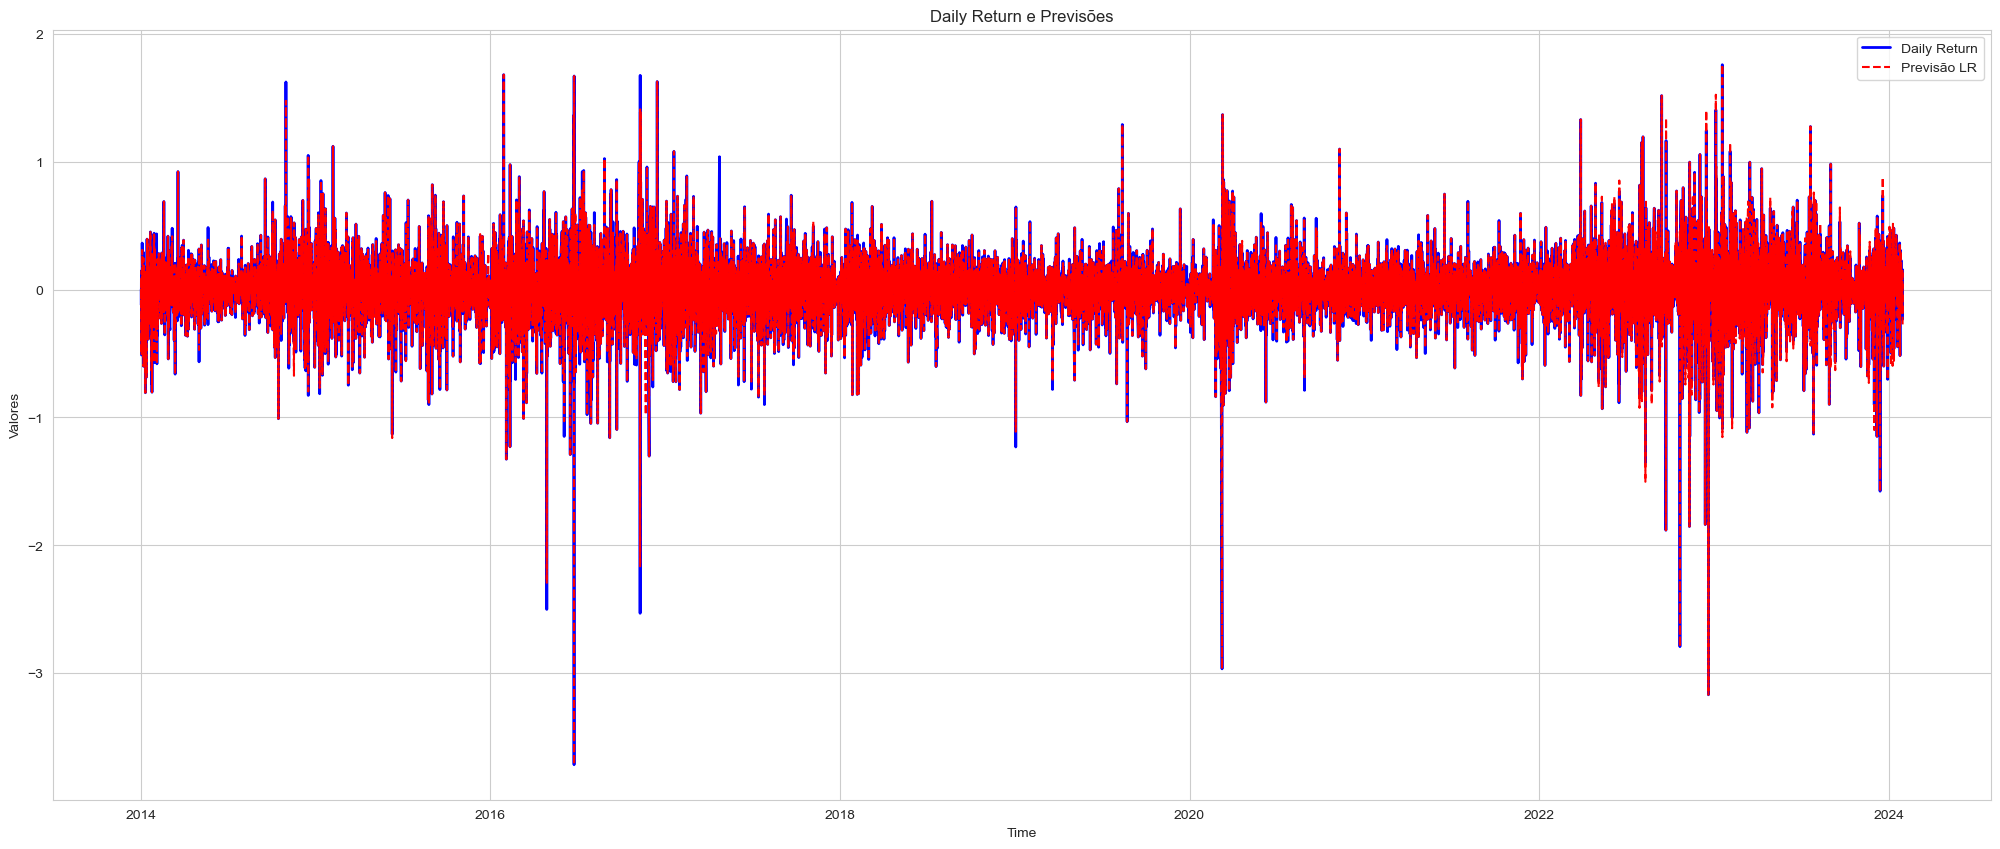

In [273]:
import matplotlib.pyplot as plt
# Plotando o gráfico
plt.figure(figsize=(25, 10))  # Ajuste o tamanho conforme necessário

# Plota 'daily_return' e cada uma das previsões
plt.plot(resul['daily_return'], label='Daily Return', color='blue', linewidth=3)
plt.plot(resul['Previsao_LR'], label='Previsão LR', color='red', linestyle='--')
#plt.plot(resul['Previsao_RF'], label='Previsão RF', color='green', linestyle='--')
#plt.plot(resul['Previsao_GB'], label='Previsão GB', color='orange', linestyle='--')
#plt.plot(resul['Previsao_SVM'], label='Previsão SVM', color='purple', linestyle='--')
#plt.plot(resul['Previsao_KNN'], label='Previsão KNN', color='brown', linestyle='--')
#plt.plot(resul['Previsao_ANN'], label='Previsão ANN', color='pink', linestyle='--')

# Adicionando títulos e legendas
plt.title('Daily Return e Previsões')
plt.xlabel('Time')
plt.ylabel('Valores')
plt.legend()

# Mostra o gráfico
plt.show()